In [1]:
from src.base_models import *
from src.dataset_lib import *
from src.ode_solvers import *
from src.comp_models import *
from src.samplers import *
from src.metrics import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

torch module path: c:\Users\JoCraft\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py
torch module dir: ['AVG', 'AggregationType', 'AliasDb', 'AnyType', 'Argument', 'ArgumentSpec', 'AwaitType', 'BFloat16Storage', 'BFloat16Tensor', 'BenchmarkConfig', 'BenchmarkExecutionStats', 'Block', 'BoolStorage', 'BoolTensor', 'BoolType', 'BufferDict', 'ByteStorage', 'ByteTensor', 'CallStack', 'Capsule', 'CharStorage', 'CharTensor', 'ClassType', 'Code', 'CompilationUnit', 'CompleteArgumentSpec', 'ComplexDoubleStorage', 'ComplexFloatStorage', 'ComplexType', 'ConcreteModuleType', 'ConcreteModuleTypeBuilder', 'DeepCopyMemoTable', 'DeserializationStorageContext', 'DeviceObjType', 'DictType', 'DisableTorchFunction', 'DisableTorchFunctionSubclass', 'DispatchKey', 'DispatchKeySet', 'DoubleStorage', 'DoubleTensor', 'EnumType', 'ErrorReport', 'Event', 'ExcludeDispatchKeyGuard', 'ExecutionPlan', 'FatalError', 'FileCheck', 'FloatStorage', 'FloatTensor', 'FloatType', 'FunctionSchema', 

In [2]:
GaussianMix = GaussianMixture.symmetric_2D(4,1.0)

gaussian_path = GaussianConditionalProbabilityPath(p_data=GaussianMix, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model1 = BasicMLP(input_dim=2, output_dim=1, hidden_dims=[64,64,64,64])

trainer = FlowDiffTrainer(path=gaussian_path, modeltype="density", model=model1)

trainer.train_loop(num_epochs=20000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 6.687302589416504
In Epoch 1000 we have a loss of 4.603612422943115
In Epoch 2000 we have a loss of 13.990594863891602
In Epoch 3000 we have a loss of 4.509937763214111
In Epoch 4000 we have a loss of 9.395328521728516
In Epoch 5000 we have a loss of 12.067418098449707
In Epoch 6000 we have a loss of 6.297475814819336
In Epoch 7000 we have a loss of 8.050339698791504
In Epoch 8000 we have a loss of 5.818850517272949
In Epoch 9000 we have a loss of 4.0785722732543945
In Epoch 10000 we have a loss of 9.884208679199219
In Epoch 11000 we have a loss of 6.300682067871094
In Epoch 12000 we have a loss of 5.901612758636475
In Epoch 13000 we have a loss of 9.232568740844727
In Epoch 14000 we have a loss of 12.081138610839844
In Epoch 15000 we have a loss of 5.9051432609558105
In Epoch 16000 we have a loss of 6.6665754318237305
In Epoch 17000 we have a loss of 12.245112419128418
In Epoch 18000 we have a loss of 11.13102912902832
In Epoch 19000 we have a loss of 7.08

In [3]:
rec1 = Rectangle(device=device, coords= [(-5.0,5.0),(-10,10)])

gaussian_path2 = GaussianConditionalProbabilityPath(p_data=rec1, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model2 = BasicMLP(input_dim=2, output_dim= 1, hidden_dims=[64,64,64,64])

trainer2 = FlowDiffTrainer(path=gaussian_path2, modeltype="density", model=model2)

trainer2.train_loop(num_epochs=20000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 8.917439460754395
In Epoch 1000 we have a loss of 10.422710418701172
In Epoch 2000 we have a loss of 5.173225402832031
In Epoch 3000 we have a loss of 9.015217781066895
In Epoch 4000 we have a loss of 7.898298263549805
In Epoch 5000 we have a loss of 4.949413299560547
In Epoch 6000 we have a loss of 6.092971324920654
In Epoch 7000 we have a loss of 10.314945220947266
In Epoch 8000 we have a loss of 5.2423200607299805
In Epoch 9000 we have a loss of 8.776927947998047
In Epoch 10000 we have a loss of 40.68698501586914
In Epoch 11000 we have a loss of 23.879560470581055
In Epoch 12000 we have a loss of 9.181459426879883
In Epoch 13000 we have a loss of 8.574955940246582
In Epoch 14000 we have a loss of 6.710006237030029
In Epoch 15000 we have a loss of 6.2902512550354
In Epoch 16000 we have a loss of 7.408116340637207
In Epoch 17000 we have a loss of 6.949790954589844
In Epoch 18000 we have a loss of 7.8965325355529785
In Epoch 19000 we have a loss of 6.435188

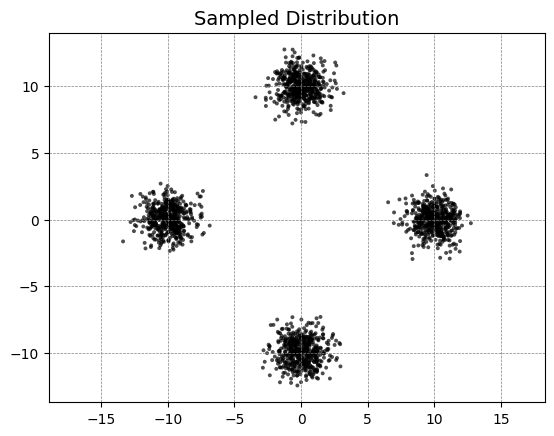

In [ ]:
plot_samples(GaussianMix.sample(2000))
plt.show()

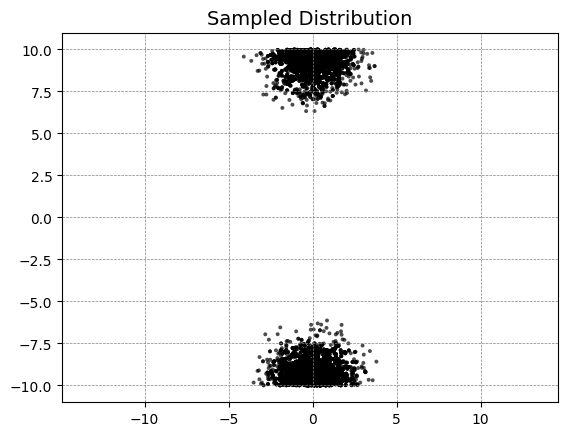

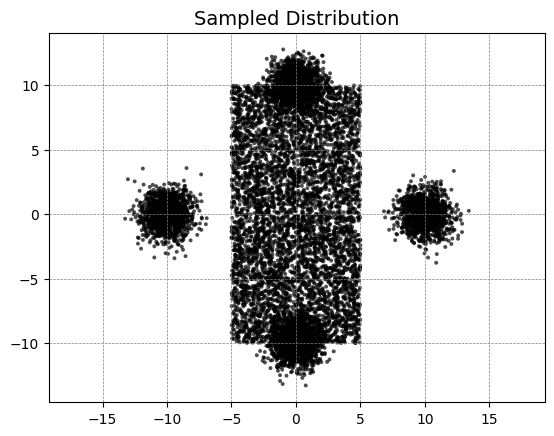

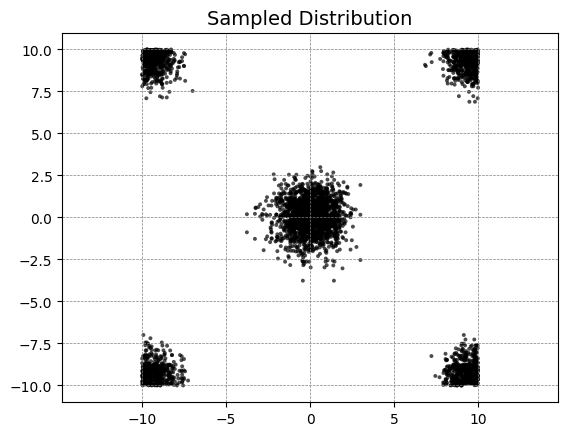

In [5]:
#samples = sample_UnionLangevin(models = [model1,model2], n= 2000, path = gaussian_path, device="cuda")
#plot_samples(samples, contour=False, scatter=True)

#sample = DensityCompSample(models = [model1,model2], n= 2000, path = gaussian_path, proposal_density = model1, n_importance=2000, device="cuda")
prod = ProductLogSample(densities=[GaussianMix, rec1], proposal_density=UnionLogSample(densities=[GaussianMix, rec1]))
union = UnionLogSample(densities=[GaussianMix, rec1])

plot_samples(prod.sample(11000))
plt.show()
plot_samples(union.sample(11000))
plt.show()

plot_samples(DensityCompSample(models = [model1,model2], n= 2000, path = gaussian_path, proposal_density = prod, true_density= True, n_importance=2000, device="cuda"), contour=False, scatter=True)
#plot_samples(sample_CompLangevin(models = [model1,model2], n= 2000, path = gaussian_path, device="cuda"))

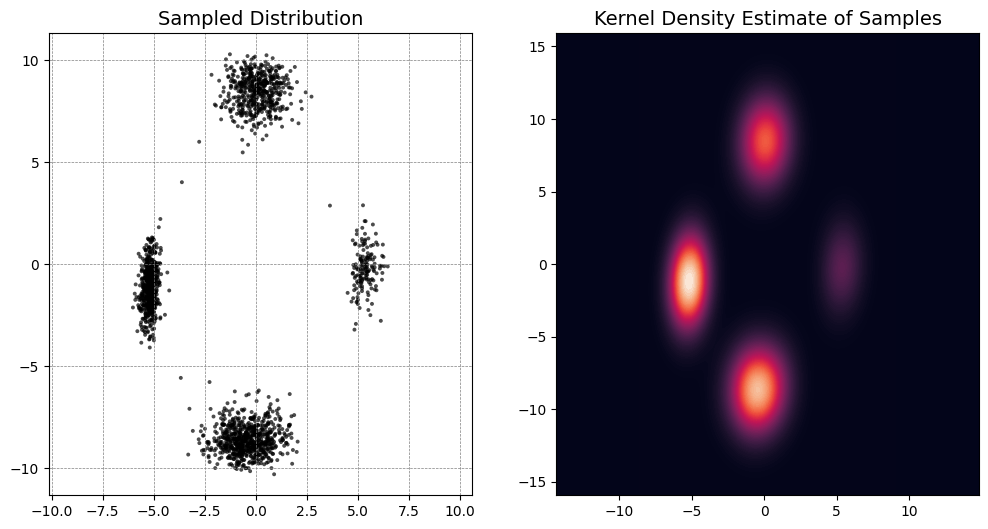

In [6]:
models = [model1,model2]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta(), density=True)

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 
samples = comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps)
figsize=(12, 6)

fig, axes = plt.subplots(1, 2, figsize = figsize)
plot_samples(samples, ax=axes[0], kde=True)
plot_kde(samples, ax = axes[1], cmap="rocket")

plt.show()

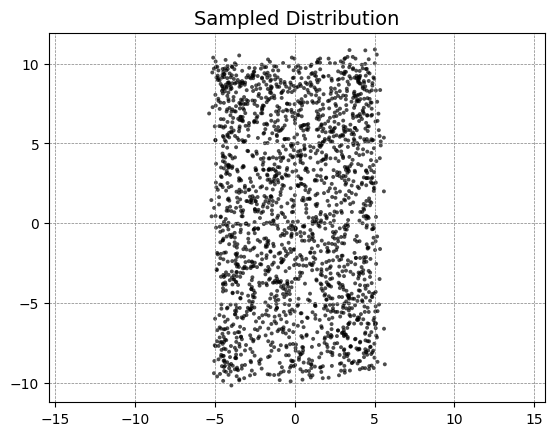

In [ ]:
models = [model2]

sde = CompLangevin(models=models, sigma = 1, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.05, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 

plot_samples(comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps),contour=False)

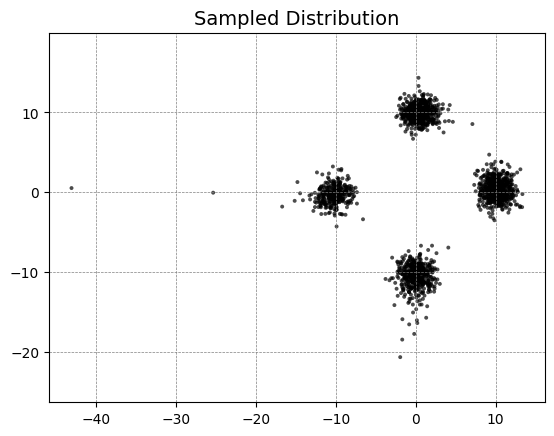

In [ ]:
models = [model1]

sde = CompLangevin(models=models, sigma = 1, density = True, alpha = LinearAlpha(), beta=SquareRootBeta())

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) 


plot_samples(comp_sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps), contour=False, scatter=True)

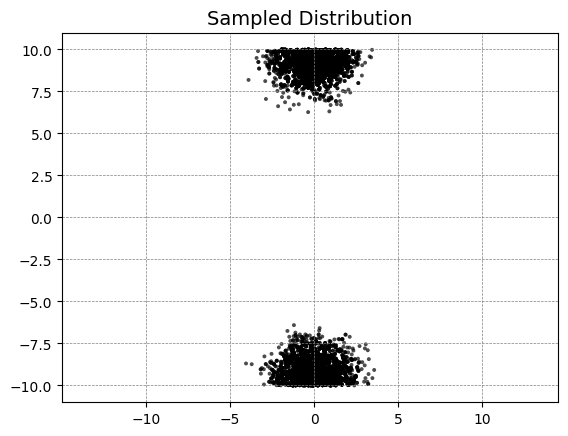

In [ ]:
prod = ProductLogSample(densities=[GaussianMix, rec1], proposal_density=UnionLogSample(densities=[GaussianMix, rec1]))

plot_samples(prod.sample(11000))

In [ ]:
#TODO: importance sampling for models, i.e. using one of the models as proposal (or something else? Maybe addition of scores or something in SDE) then standard IS
#TODO: DO Annealed for models 
#TODO: Metrics
#TODO: MORE EXAMPLES; TABELLE

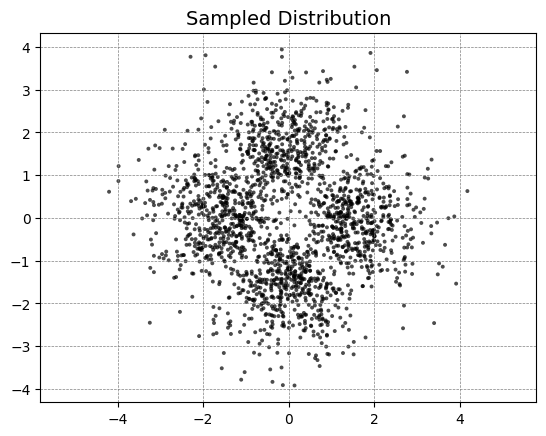

In [ ]:
GaussianMix = GaussianMixture.symmetric_2D(4,1.0)
rec1 = Rectangle(device=device, coords= [(-5.0,5.0),(-10,10)])
gaussian_path = GaussianConditionalProbabilityPath(p_data=GaussianMix, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)


sde = AnnealedProduct(densities=[GaussianMix], proposal_density=UnionLogSample(densities=[GaussianMix, rec1]), alpha=CosineAlpha(), sigma=0.5)

comp_solver = EulerSDESolver(sde)

comp_sampler = Sampler(comp_solver)

steps= torch.linspace(0.1, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device) # [batch_size, num_steps, 1]

plot_samples(comp_sampler.sample_with_traj(gaussian_path.p_init.sample(2000), steps)[-1])